We are about to finish our studies and the idea is to see which skills are often requested by job seekers and which ones seem less interesting. At first, we will simply see what skills or programming language are important to find a job as data scientist. Then in a second step we will push the analysis further by also looking at the salary and if some skills have a significant impact on the salary.

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
data = pd.read_csv("Uncleaned_DS_jobs.csv")

# Main Idea of the project :

We used a Database that we found on Kaggle that with more than 650 data sciences jobs in the USA. We have the localisation, the description, the salary and so on.

### 1) Look at the hard/soft skills mentioned in the Job Description
We ask ourself which skills are often used. We will try to improve my Github profile on the results.

### 2) Clustering
We think that jobs that require knowledge in cloud computing are often better paid for example.

## First step : Data preparation

In [3]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
len(data)

672

In [5]:
data = data.drop(labels=["Industry","Location","Job Title","Rating","Headquarters","Size","Founded","Type of ownership","Revenue","Competitors","Sector","Company Name"],axis="columns")

In [6]:
data.columns

Index(['index', 'Salary Estimate', 'Job Description'], dtype='object')

We decided to keep the description and the salary.

In [8]:
print(data.isna().sum())

index              0
Salary Estimate    0
Job Description    0
dtype: int64


In [9]:
list_test = data["Job Description"].values.tolist()

In [10]:
list_test[1]

#lets see an example of a description

"Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic professionals in the industry to make invaluable contributions to our national security on a daily basis. In this innovative, self-contained, Big Data environment, the ManTech team is responsible for everything from infrastructure, to application development, to data science, to advanced analytics and beyond. The team is diverse, the questions are thought-provoking, and the opportunities for growth and advancement are numerous\n\nThe successful candidate will possess a diverse range of data-focused skills and experience, both technical and analytical. They will have a strong desire and capability for problem solving, data analysis and troubleshooting, analytical thinking, and experimentation.\n\nDuties, Tasks & Responsibilities\nWorking with large, complex, and disparate data sets\nDesigning and implementing innovative ways to analyze and exploit the Sponsors data holdings\nResearching and report

### So we need to : 

- We have to replace the "\n" as you can see there are many of them
- Lower all the letters
- Kick out all non alphatic caracter like .,;:^ etc

We also found out that the words like data science need to be written as datascience so when we tokenize the words we dont compute data and science but data science (same for other words from the jargon)

In [11]:
data["Job Description"] = data["Job Description"].str.replace("\n"," ")
data["Job Description"] = data["Job Description"].str.lower()

Here we started to combine some words (We took the most important one)

In [12]:
data["Job Description"] = data["Job Description"].str.replace("data scientist","datascientist")
data["Job Description"] = data["Job Description"].str.replace("amazon web services","aws") 
data["Job Description"] = data["Job Description"].str.replace("structured query language","sql")
data["Job Description"] = data["Job Description"].str.replace("sequel","sql")
data["Job Description"] = data["Job Description"].str.replace("google cloud","gcp")
data["Job Description"] = data["Job Description"].str.replace("google cloud platform","gcp")
data["Job Description"] = data["Job Description"].str.replace("data science","datascience")
data["Job Description"] = data["Job Description"].str.replace("computer science","computerscience")
data["Job Description"] = data["Job Description"].str.replace("statistical models","statisticalmodels")
data["Job Description"] = data["Job Description"].str.replace("machine learning","machinelearning")
data["Job Description"] = data["Job Description"].str.replace("data mining","datamining")
data["Job Description"] = data["Job Description"].str.replace("data analysis","dataanalysis")
data["Job Description"] = data["Job Description"].str.replace("cloud computing","cloudcomputing")

# we fix the space that we created just recreate with the replace \n

data["Job Description"] = data["Job Description"].str.replace("  "," ")

In [13]:
data["Job Description"] = data["Job Description"].str.replace("[^a-zA-Z0-9]", " ")

# with regex i only take all letters from a to z and all numbers from 0 to 9 and not the rest

C:\Users\louis\AppData\Local\Temp\ipykernel_15800\2176103475.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Job Description"] = data["Job Description"].str.replace("[^a-zA-Z0-9]", " ")


In [14]:
data["Job Description"] = data["Job Description"].str.replace("  "," ")

# Again just fixing space

In [15]:
list_test2 = data["Job Description"].values.tolist()
list_test2[1]

'secure our nation ignite your future join the top information technology and analytic professionals in the industry to make invaluable contributions to our national security on a daily basis in this innovative self contained big data environment the mantech team is responsible for everything from infrastructure to application development to datascience to advanced analytics and beyond the team is diverse the questions are thought provoking and the opportunities for growth and advancement are numerous the successful candidate will possess a diverse range of data focused skills and experience both technical and analytical they will have a strong desire and capability for problem solving dataanalysis and troubleshooting analytical thinking and experimentation duties tasks  responsibilities working with large complex and disparate data sets designing and implementing innovative ways to analyze and exploit the sponsors data holdings researching and reporting on a wide variety of sponsor in

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
descriptions = data["Job Description"].apply(word_tokenize)

### Lets kick out every useless stopwords :

In [23]:
stop_words = set(stopwords.words("english"))
descriptions = descriptions.apply(lambda x: [word for word in x if word not in stop_words])

In [24]:
descriptions

0      [description, senior, datascientist, responsib...
1      [secure, nation, ignite, future, join, top, in...
2      [overview, analysis, group, one, largest, inte...
3      [job, description, passion, data, machinelearn...
4      [datascientist, affinity, solutions, marketing...
                             ...                        
667    [summary, looking, datascientist, drive, datas...
668    [job, description, become, thought, leader, wi...
669    [join, thriving, company, changing, way, cance...
670    [100, remote, opportunity, ainlp, datascientis...
671    [description, datascientist, part, enterprise,...
Name: Job Description, Length: 672, dtype: object

### We will put everything in one block to take the most used words and it will be usefull later

In [25]:
corpus = [word for desc in descriptions for word in desc]

In [26]:
fdist2 = FreqDist(corpus)

common_words = [word for word, freq in fdist2.most_common(500)]

### So we decided to search for words on our own :

We did this with some Hard and Soft skills

In [27]:
hardskills = [word for word in common_words if word in ["python","c","sql","nosql","r","sas","mongodb","cassandra"]]
hardskills 
#they are all mentioned in the top 500 words exept mongodb and cassandra

['python', 'sql', 'r', 'c', 'sas']

In [28]:
Cloudskills = [word for word in common_words if word in ["cloudcomputing","cloud","aws","azure","gcp"]]
Cloudskills
#Ajouter encore d'autres mots qui peuvent ressembler

['cloud', 'aws']

In [29]:
Otherskills = [word for word in common_words if word in ["processing","visualization","dataanalytics","datamining","machinelearning","statistics"]]
Otherskills

['machinelearning', 'statistics', 'processing', 'visualization', 'datamining']

### We can see that : 

- Python and R are both in the top 1000 so we will compare them (with other programming langages)
- We will take a look on SQL/NoSQL
- then we will look at cloud computing
- We will look at some other skills (visualisation, mining and so on)

In [30]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [31]:
print(corpus.count('python'))
print(corpus.count('r'))
print(corpus.count('sas'))
print(corpus.count('c'))

646
449
105
217


C:\Users\louis\AppData\Local\Temp\ipykernel_15800\754365949.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


<Figure size 640x480 with 0 Axes>

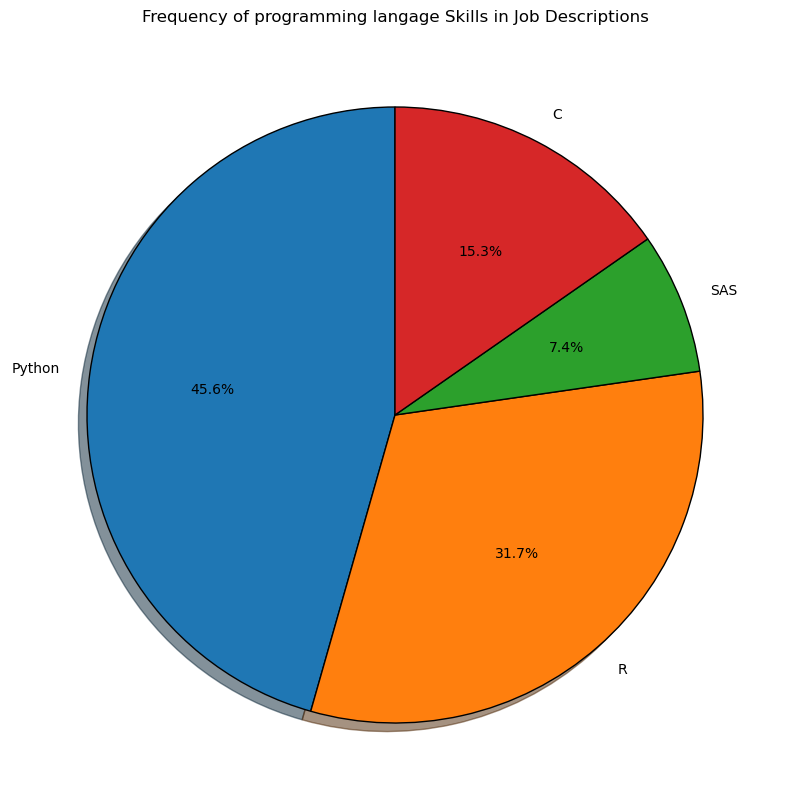

In [32]:
python_count = corpus.count('python')
r_count = corpus.count('r')
sas_count = corpus.count('sas')
c_count = corpus.count('c')

g = plt.figure(1)
slices2 = [python_count,r_count,sas_count,c_count]
labels2 = ["Python","R","SAS","C"]
plt.figure(figsize=(10,10))
plt.pie(x=slices2,labels=labels2, wedgeprops={'edgecolor':'black'},shadow=True,
       startangle=90,autopct="%1.1f%%")
plt.title("Frequency of programming langage Skills in Job Descriptions")
g.show()

Python is more often used in the descriptions than R (sorry for that mister Hain). Sas isnt that attractif to learn even C is more often mentioned (I guess to create intern apps).

In [33]:
sql_count = corpus.count('sql')
nosql_count = corpus.count('nosql') + corpus.count('mongodb') + corpus.count('redis') + corpus.count('cassandra')

print(sql_count)
print(nosql_count)

457
131


This kind of result was obvious, SQL is way more used than NoSQL especially in Firms. Anyway i want to learn to manipulate NoSQL so let's see which of the main NoSQL services that i know will be the more asked one.

C:\Users\louis\AppData\Local\Temp\ipykernel_15800\2205272329.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


<Figure size 640x480 with 0 Axes>

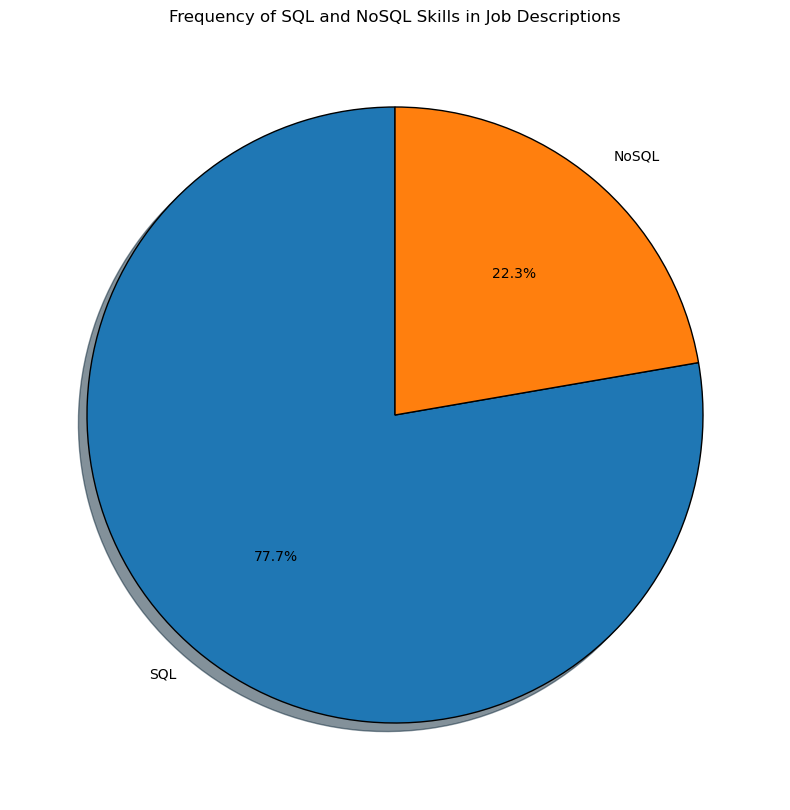

In [34]:
sql_count = corpus.count('sql')
nosql_count = corpus.count('nosql') + corpus.count('mongodb') + corpus.count('redis') + corpus.count('cassandra')

g = plt.figure(1)
slices2 = [sql_count,nosql_count]
labels2 = ["SQL","NoSQL"]
plt.figure(figsize=(10,10))
plt.pie(x=slices2,labels=labels2, wedgeprops={'edgecolor':'black'},shadow=True,
       startangle=90,autopct="%1.1f%%")
plt.title("Frequency of SQL and NoSQL Skills in Job Descriptions")
g.show()

In [35]:
print(corpus.count("mongodb"))
print(corpus.count("redis"))
print(corpus.count("cassandra"))

22
7
24


C:\Users\louis\AppData\Local\Temp\ipykernel_15800\178188361.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


<Figure size 640x480 with 0 Axes>

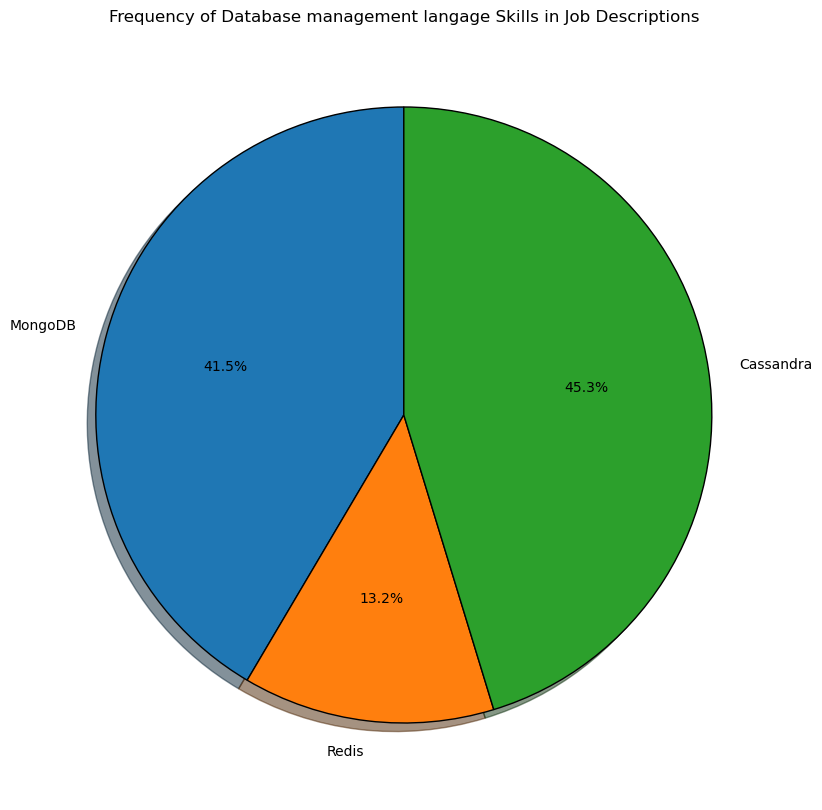

In [36]:
mondo_count = corpus.count("mongodb") 
redis_count = corpus.count("redis") 
cassandra_count = corpus.count("cassandra")

g = plt.figure(1)
slices2 = [mondo_count,redis_count,cassandra_count]
labels2 = ["MongoDB","Redis","Cassandra"]
plt.figure(figsize=(10,10))
plt.pie(x=slices2,labels=labels2, wedgeprops={'edgecolor':'black'},shadow=True,
       startangle=90,autopct="%1.1f%%")
plt.title("Frequency of Database management langage Skills in Job Descriptions")
g.show()

We took the 3 main NoSQL database management program that we know. We already used MongoDB so why not try out Cassandra. We see that they are rarly mentioned only 20-25 times, so we dont even know if it is worth it for us to learn to manipulate NoSQL to optimize the job searching.

In [37]:
print(corpus.count("cloudcomputing")+corpus.count("cloud"))

#Lets take a look at cloudcomputing

290


In [38]:
print(corpus.count("aws"))
print(corpus.count("azure"))
print(corpus.count("gcp"))

213
77
40


C:\Users\louis\AppData\Local\Temp\ipykernel_15800\2578769701.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


<Figure size 640x480 with 0 Axes>

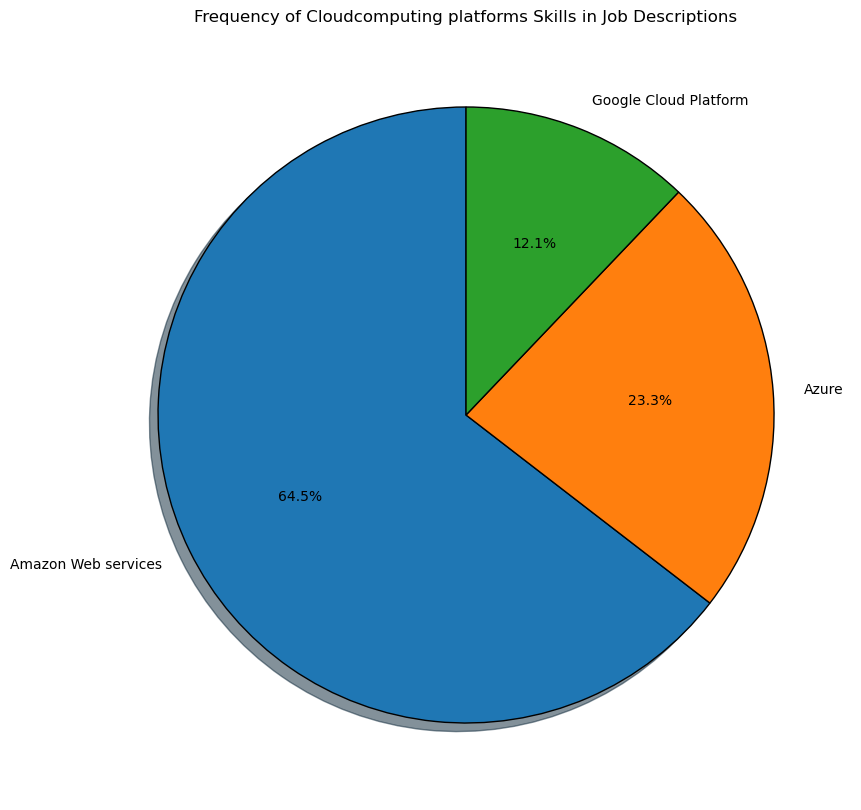

In [39]:
aws_count=corpus.count("aws")
azure_count=corpus.count("azure")
gcp_count=corpus.count("gcp")

g = plt.figure(1)
slices2 = [aws_count,azure_count,gcp_count]
labels2 = ["Amazon Web services", "Azure","Google Cloud Platform"]
plt.figure(figsize=(10,10))
plt.pie(x=slices2,labels=labels2, wedgeprops={'edgecolor':'black'},shadow=True,
       startangle=90,autopct="%1.1f%%")
plt.title("Frequency of Cloudcomputing platforms Skills in Job Descriptions")
g.show()

# 2) Clustering de descriptions d'emploi 

In [40]:
data["Salary Estimate"].value_counts()

$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo

### First we will clean the column with the salary 

In [41]:
data["Salary Estimate"] = data["Salary Estimate"].str.replace("(Glassdoor est.)", "")

C:\Users\louis\AppData\Local\Temp\ipykernel_15800\3971490404.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Salary Estimate"] = data["Salary Estimate"].str.replace("(Glassdoor est.)", "")


In [42]:
data["Salary Estimate"].value_counts()

$79K-$131K ()                 32
$99K-$132K ()                 32
$75K-$131K ()                 32
$137K-$171K ()                30
$90K-$109K ()                 30
$56K-$97K ()                  22
$79K-$106K ()                 22
$90K-$124K ()                 22
$110K-$163K ()                21
$92K-$155K ()                 21
$138K-$158K ()                21
$128K-$201K ()                21
$212K-$331K ()                21
$95K-$119K ()                 21
$69K-$116K ()                 21
$124K-$198K ()                21
$112K-$116K ()                21
$122K-$146K ()                21
$91K-$150K ()                 21
$101K-$165K ()                21
$79K-$147K ()                 20
$31K-$56K ()                  20
$145K-$225K(Employer est.)    20
$141K-$225K ()                20
$66K-$112K ()                 20
$80K-$132K ()                 20
$87K-$141K ()                 20
$105K-$167K ()                20
$79K-$133K ()                 19
$71K-$123K ()                 19
Name: Sala

In [43]:
data["Salary Estimate"] = data["Salary Estimate"].str.replace("(Employer est.)", "")
data["Salary Estimate"] = data["Salary Estimate"].str.replace("$","")
data["Salary Estimate"] = data["Salary Estimate"].str.replace("K","")
data["Salary Estimate"] = data["Salary Estimate"].str.replace("\(\)","")

C:\Users\louis\AppData\Local\Temp\ipykernel_15800\1647144621.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Salary Estimate"] = data["Salary Estimate"].str.replace("(Employer est.)", "")
C:\Users\louis\AppData\Local\Temp\ipykernel_15800\1647144621.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Salary Estimate"] = data["Salary Estimate"].str.replace("$","")
C:\Users\louis\AppData\Local\Temp\ipykernel_15800\1647144621.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Salary Estimate"] = data["Salary Estimate"].str.replace("\(\)","")


In [44]:
data["Salary Estimate"].value_counts()

79-131      32
99-132      32
75-131      32
137-171     30
90-109      30
56-97       22
79-106      22
90-124      22
110-163     21
92-155      21
138-158     21
128-201     21
212-331     21
95-119      21
69-116      21
124-198     21
112-116     21
122-146     21
91-150      21
101-165     21
79-147      20
31-56       20
145-225     20
141-225     20
66-112      20
80-132      20
87-141      20
105-167     20
79-133      19
71-123      19
Name: Salary Estimate, dtype: int64

### We will create an monthly average salary now (just so we can imagine how much this represent in real life)

In [45]:
data["Min_Salary"] = data["Salary Estimate"].str.split("-").str[0]
data["Max_Salary"] = data["Salary Estimate"].str.split("-").str[1]

In [46]:
data.dtypes

index               int64
Salary Estimate    object
Job Description    object
Min_Salary         object
Max_Salary         object
dtype: object

In [47]:
data["Min_Salary"]= data["Min_Salary"].astype(int)
data["Max_Salary"]= data["Max_Salary"].astype(int)

In [48]:
data["AVG_Salary"]= (data["Min_Salary"]+data["Max_Salary"])/2
data["AVG_Salary"].astype(int)
data["AVG_Salary"] = data["AVG_Salary"]*1000
data["AVG_Salary_mensuel"] = data["AVG_Salary"]/12

In [49]:
data["AVG_Salary_mensuel"].value_counts()

7708.333333     43
8916.666667     43
9500.000000     41
8833.333333     39
8583.333333     32
8750.000000     32
9625.000000     32
12833.333333    30
8291.666667     30
6375.000000     22
13416.666667    21
11375.000000    21
11166.666667    21
10041.666667    21
13708.333333    21
12333.333333    21
22625.000000    21
10291.666667    21
11083.333333    21
7416.666667     20
9416.666667     20
3625.000000     20
15416.666667    20
15250.000000    20
11333.333333    20
8083.333333     19
Name: AVG_Salary_mensuel, dtype: int64

In [50]:
data = data.drop(labels=["Max_Salary","Min_Salary","Salary Estimate","AVG_Salary"],axis="columns")

Now Salary is ready to use to try a clustering, but we will need to vectorize our description so we can also use them for the clustering

## TF-IDF :

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
len(data["Job Description"])

672

## Lets create the TFI-IDF matrix

In [53]:
descriptions_numpy = data["Job Description"].to_numpy()
tfidf = TfidfVectorizer(min_df=0.1,stop_words='english',vocabulary=["python", "sql", "cloud"])
# with min_df=0.1 i preselected words with a certain frequency because there were
# many words left that arent that interesting

# we are looking for python sql and cloud competences in the description

tfidf_matrix = tfidf.fit_transform(descriptions_numpy)
feature_names = tfidf.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)



In [54]:
df_tfidf.head() 
#We got the matrix

,python,sql,cloud
0,0.000000,0.000000,1.000000
1,0.000000,1.000000,0.000000
2,1.000000,0.000000,0.000000
3,0.608328,0.793685,0.000000
4,0.170337,0.222238,0.959998


In [55]:
data.dtypes

index                   int64
Job Description        object
AVG_Salary_mensuel    float64
dtype: object

In [56]:
df_clustering = pd.concat([df_tfidf,data["AVG_Salary_mensuel"]], axis=1)

In [57]:
df_clustering

,python,sql,cloud,AVG_Salary_mensuel
0,0.000000,0.000000,1.000000,12833.333333
1,0.000000,1.000000,0.000000,12833.333333
2,1.000000,0.000000,0.000000,12833.333333
3,0.608328,0.793685,0.000000,12833.333333
4,0.170337,0.222238,0.959998,12833.333333
...,...,...,...,...
667,0.608328,0.793685,0.000000,11333.333333
668,0.000000,0.000000,0.000000,11333.333333
669,0.608328,0.793685,0.000000,11333.333333
670,1.000000,0.000000,0.000000,11333.333333


### Now lets scale the data and try to cluster it

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=df_clustering.columns)

#If we dont scale we dont really mesure the difference between the different description, 
# the differences between salary will be to high in comparison to the word frequency

In [59]:
df_clustering_scaled

# Lets try to identify some cluster now !

,python,sql,cloud,AVG_Salary_mensuel
0,-1.317806,-0.905896,2.328157,0.767021
1,-1.317806,1.638264,-0.529545,0.767021
2,1.303597,-0.905896,-0.529545,0.767021
3,0.276868,1.113366,-0.529545,0.767021
4,-0.871285,-0.340487,2.213843,0.767021
...,...,...,...,...
667,0.276868,1.113366,-0.529545,0.311910
668,-1.317806,-0.905896,-0.529545,0.311910
669,0.276868,1.113366,-0.529545,0.311910
670,1.303597,-0.905896,-0.529545,0.311910


In [60]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=Warning)

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:02<00:00,  8.04it/s]


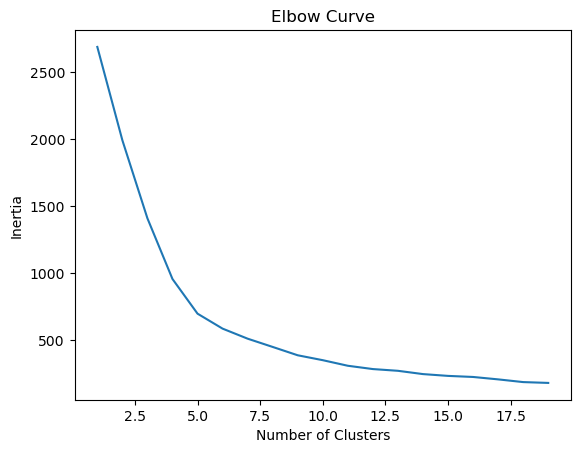

In [61]:
from tqdm import tqdm

inertias = []

for k in tqdm(range(1, 20)):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_clustering_scaled)
    inertias.append(kmeans.inertia_)
    
plt.plot(range(1, 20), inertias)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### We tried 4 and 5 cluster and 4 is better because we will get a better repartition

In [62]:
n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_clustering_scaled)

data['cluster'] = kmeans.labels_

df_clustering_scaled['cluster'] = kmeans.predict(df_clustering_scaled)

In [63]:
df_clustering_scaled['cluster'].value_counts()

#ptdr super alexandre bravo pour la caméra
#This one sucks

3    235
1    171
2    140
0    105
4     21
Name: cluster, dtype: int64

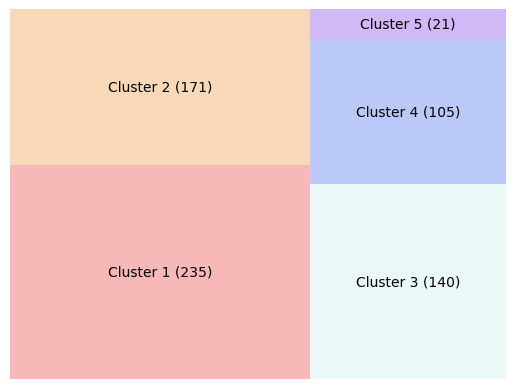

In [65]:
import squarify

counts = data['cluster'].value_counts()
colors = ['#F5A7A7', '#F5D0A9', '#E5F7F7', '#A9BCF5', '#C9A7F5']
labels = [f'Cluster {i+1} ({count})' for i, count in enumerate(counts)]
sizes = [count for count in counts]
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.axis('off')
plt.show()

### The cluster 5 is really smaller than the other let's see what happen with 4 :

In [66]:
n_clusters = 4

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_clustering_scaled)

data['cluster'] = kmeans.labels_

df_clustering_scaled['cluster'] = kmeans.predict(df_clustering_scaled)

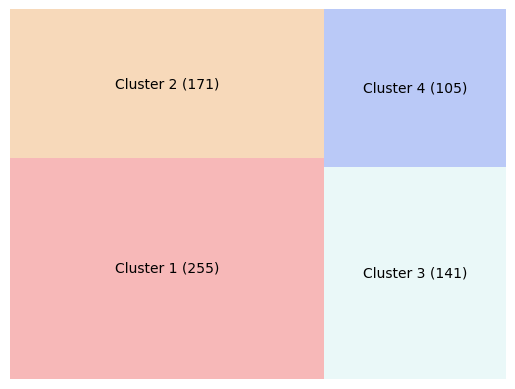

In [67]:
import squarify

counts = data['cluster'].value_counts()
colors = ['#F5A7A7', '#F5D0A9', '#E5F7F7', '#A9BCF5']
labels = [f'Cluster {i+1} ({count})' for i, count in enumerate(counts)]
sizes = [count for count in counts]
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)
plt.axis('off')
plt.show()

 4 cluster is better we have similar size of cluster

## What does our clustering tells us ?

In [68]:
data

,index,Job Description,AVG_Salary_mensuel,cluster
0,0,description the senior datascientist is respon...,12833.333333,3
1,1,secure our nation ignite your future join the ...,12833.333333,1
2,2,overview analysis group is one of the largest ...,12833.333333,2
3,3,job description do you have a passion for data...,12833.333333,1
4,4,datascientist affinity solutions marketing cl...,12833.333333,3
...,...,...,...,...
667,667,summary we re looking for a datascientist to d...,11333.333333,1
668,668,job description become a thought leader within...,11333.333333,0
669,669,join a thriving company that is changing the w...,11333.333333,1
670,670,100 remote opportunity as an ainlp datascienti...,11333.333333,2


### We had the classic idea when it comes to text data, the wordcloud (it isn't really scientific but it looks cool and we can have our first insights on our clustering)

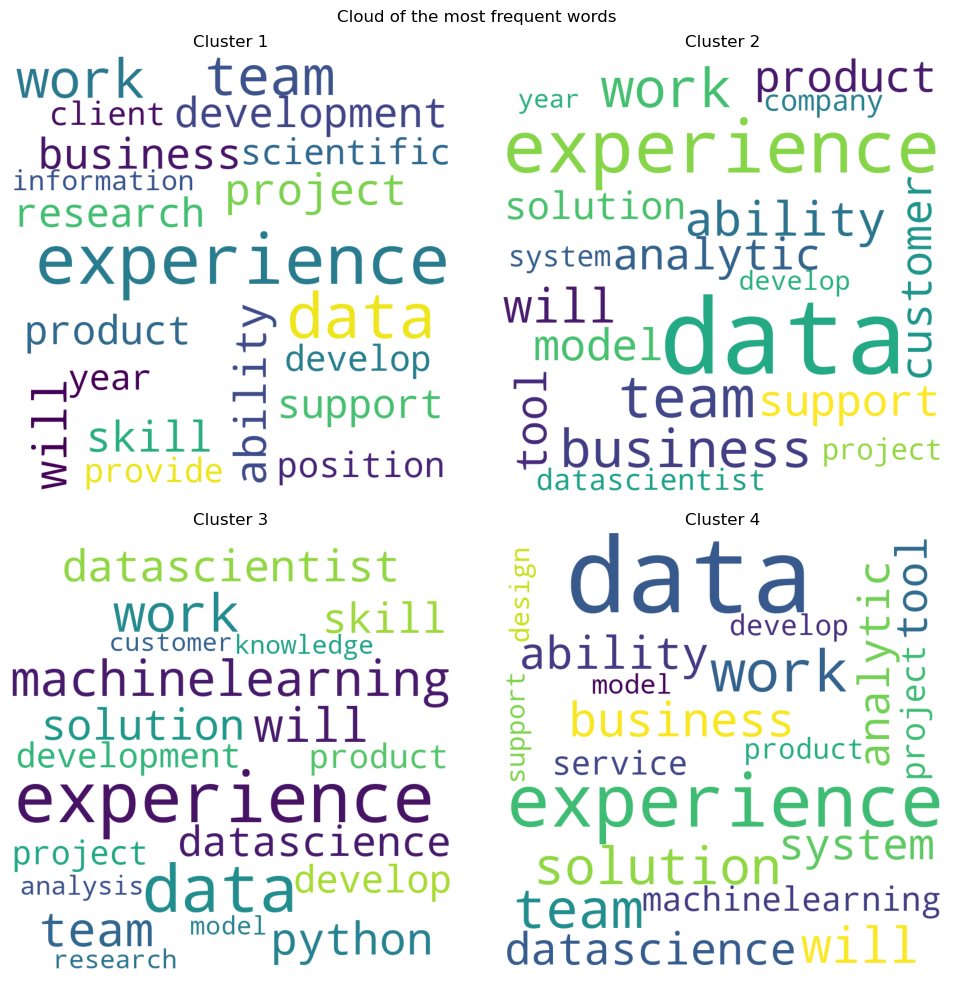

In [98]:
from wordcloud import WordCloud

# Suppose `data` est votre ensemble de données et `cluster` sont les étiquettes de cluster prédites par KMeans
n_clusters=4
cluster_texts = []
for i in range(n_clusters):
    text = ' '.join(data[data["cluster"] == i]["Job Description"])
    cluster_texts.append(text)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for i, text in enumerate(cluster_texts):
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=20).generate(text)
    axs[i].imshow(wordcloud)
    axs[i].axis("off")
    axs[i].set_title("Cluster " + str(i+1))

plt.suptitle("Cloud of the most frequent words")
plt.subplots_adjust(hspace=1, wspace=1) # augmente l'espace entre les sous-graphes
plt.tight_layout()
plt.show()

What comes first to the eye is that in every cluster, the words "data" and "experience" are among the most frequent one.
Pretty logc result when it comes to jobs in DataScience.

Nevertheless, you can see that some words are pretty different between clusters.

- For example in cluster 1 , we have in the most frequent words "scientific","research","develop" or "development". It may tell us that the offers in the cluster 1 are oriented around the data science technical aspect and less around the market (Even if there are "business" or "client" in the most frequent words)
- On the contrary, in cluster 2 we have the words "business","customers","company" or even "solution" that give us the hypothesis that the offers in this cluster may be more market oriented / around the marketing aspects

We quickly understand that our wordclouds are still very similar to each others. 
We need to try better methods in order to find an answer to our research question.

# When we are searching for a job, many companies do not tell directly the salary for the task. We then wanted to be able to predict based on the job offer the wage that the company would offer us.

## Wage prediction on job offers

In [196]:
mots_cles = ['python', 'r', 'sql', 'big', 'hadoop', 'spark', 'nosql', 'mining', 'machine', 'deep', 'nlp', 'tensorflow', 'keras', 'pytorch', 'cloud', 'aws', 'azure', 'gcp', 'docker', 'kubernetes']

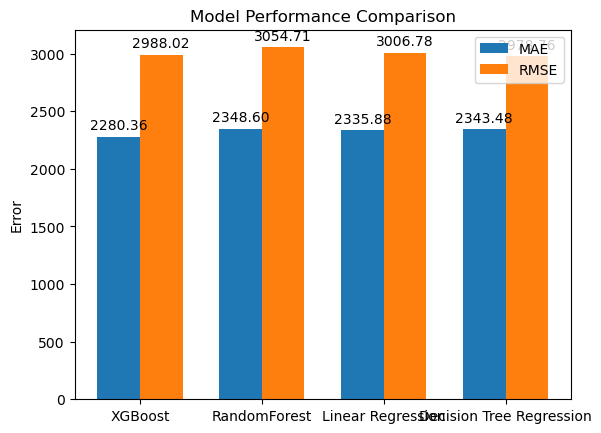

In [198]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Séparer les données en variables explicatives et variable cible
X = data['Job Description']
y = data['AVG_Salary_mensuel']


# Créer une matrice de features avec TF-IDF
vectorizer = TfidfVectorizer(min_df=0.1,stop_words='english',vocabulary=mots_cles)
X = vectorizer.fit_transform(X)

# Diviser les données en ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les modèles
models = [
    ('XGBoost', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)),
    ('RandomForest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regression', DecisionTreeRegressor(max_depth=3))]

# Entrainement des modèles et évaluation
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results.append((mae, rmse))
    names.append(name)

# Visualisation des résultats
ind = np.arange(len(results))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, [r[0] for r in results], width, label='MAE')
rects2 = ax.bar(ind + width/2, [r[1] for r in results], width, label='RMSE')

ax.set_ylabel('Error')
ax.set_title('Model Performance Comparison')
ax.set_xticks(ind)
ax.set_xticklabels(names)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

## We decided to choose XGBoost because it was the best performing model
- Let's see what words are the most important in our model

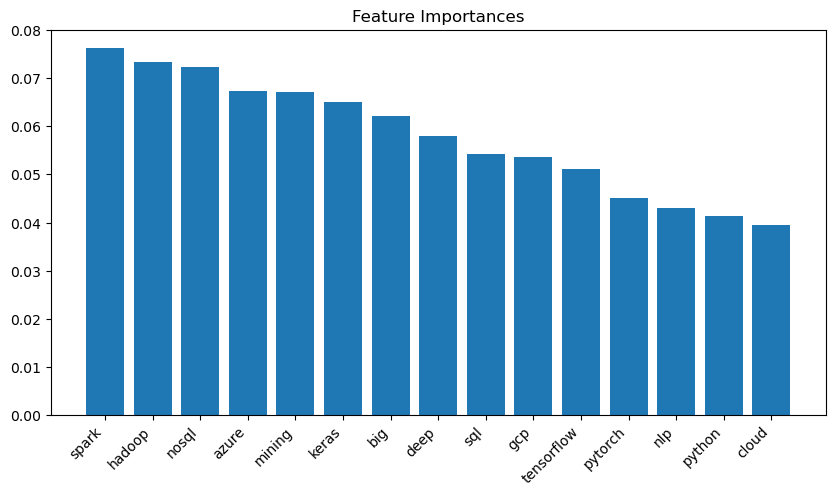

In [199]:
# Visualisation des features importants pour le modèle XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
features = vectorizer.get_feature_names()
top_n = 15
indices = indices[:top_n]
features_top_n = [features[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(top_n), importance[indices])
plt.xticks(range(top_n), features_top_n, rotation=45, ha='right')
plt.show()